In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.16.1'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('DataSets/Churn_Modelling.csv')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataset.shape

(10000, 14)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
dataset[dataset.dtypes[dataset.dtypes == 'object'].index]

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


# Dividing  the data into dependent and independent features

In [12]:
X = dataset.iloc[:,3:13]
y = dataset['Exited']

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


# Feature Engineering Part
1 - Conversion of categorical data into discrete data

In [16]:
dataset[dataset.dtypes[dataset.dtypes == 'object'].index]

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [17]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
geography =pd.get_dummies(X['Geography'], drop_first=True).astype('Int64')

In [19]:
gender = pd.get_dummies(X['Gender'], drop_first=True).astype('Int64')

In [20]:
X.drop(['Geography', 'Gender'], axis=1,inplace=True)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
X = pd.concat([X,geography,gender],axis=True)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y)

In [27]:
print(X_train_full.shape)
print(X_test.shape)

(7500, 11)
(2500, 11)


In [28]:
X_train, X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [29]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5625, 11)
(1875, 11)
(5625,)
(1875,)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar = StandardScaler()

In [32]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
X_valid = scalar.transform(X_valid)

In [33]:
X_train

array([[-0.20277484,  0.95877476, -1.37859006, ..., -0.57043892,
         1.72815924, -1.10524386],
       [ 0.80243133,  2.19736506,  0.00337814, ..., -0.57043892,
        -0.57865038,  0.90477771],
       [ 0.15992842, -0.08926319,  1.38534635, ..., -0.57043892,
         1.72815924,  0.90477771],
       ...,
       [ 0.09775072, -0.85147261,  1.0398543 , ...,  1.75303605,
        -0.57865038, -1.10524386],
       [ 0.35682447,  0.67294623, -0.68760596, ...,  1.75303605,
        -0.57865038, -1.10524386],
       [ 1.496749  ,  0.57767005,  1.0398543 , ..., -0.57043892,
         1.72815924,  0.90477771]])

In [34]:
X_train.shape

(5625, 11)

# Now Create ANN Model

In [35]:
import tensorflow as tf

In [36]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [37]:
classifier = Sequential()

In [38]:
X_train.shape[1:]

(11,)

In [39]:
classifier.add(Dense(units = 11, activation = 'relu', name = 'Input_Layer'))

In [41]:
classifier.add(Dense(units = 7, activation = 'relu', name = 'First_Hidden_Layer'))

ValueError: All layers added to a Sequential model should have unique names. Name 'First_Hidden_Layer' is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [42]:
classifier.add(Dense(units = 6, activation = 'relu', name = 'Second_Hidden_Layer'))

In [43]:
classifier.add(Dense(units = 1, activation = 'sigmoid', name = 'Output_Layer'))

In [44]:
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['Accuracy'])

2024-05-10 23:27:12.511833: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-10 23:27:12.511856: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-10 23:27:12.511867: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-10 23:27:12.511916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-10 23:27:12.511932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
early_Stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,)

In [46]:
model_history = classifier.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs=100, batch_size=10, callbacks=early_Stopping)

Epoch 1/100


2024-05-10 23:27:25.810982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - Accuracy: 0.7926 - loss: 0.5314 - val_Accuracy: 0.8208 - val_loss: 0.4452
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8142 - loss: 0.4456 - val_Accuracy: 0.8245 - val_loss: 0.4162
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8243 - loss: 0.4187 - val_Accuracy: 0.8277 - val_loss: 0.4014
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8177 - loss: 0.4183 - val_Accuracy: 0.8368 - val_loss: 0.3861
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8310 - loss: 0.3939 - val_Accuracy: 0.8411 - val_loss: 0.3759
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8335 - loss: 0.3929 - val_Accuracy: 0.8480 - val_loss: 0.3666
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8391 - loss: 0.3767 - val_Accuracy: 0.8501 - val_loss: 0.3592
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8484 - loss: 0.3659 - val_Accuracy: 0.857

KeyboardInterrupt: 

In [311]:
model_history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

<Axes: >

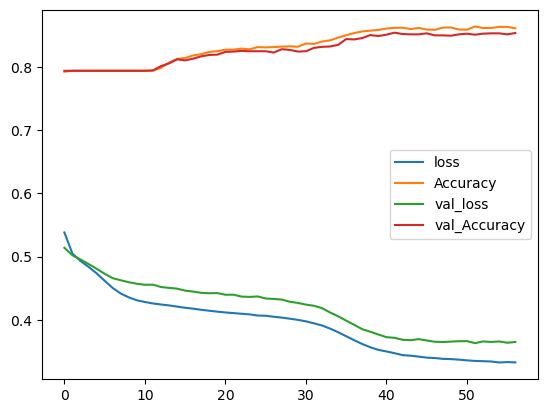

In [314]:
pd.DataFrame(model_history.history).plot()

In [333]:
classifier.evaluate(X_test,y_test)

79/79 [==============================] - 1s 5ms/step - loss: 0.3398 - Accuracy: 0.8596


[0.3397904932498932, 0.8596000075340271]

# Prediction

In [327]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

 1/79 [..............................] - ETA: 1s

79/79 [==============================] - 0s 2ms/step


# Confusion Matrix

In [322]:
from sklearn.metrics import confusion_matrix

In [332]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1899,  111],
       [ 240,  250]])

In [318]:
from sklearn.metrics import accuracy_score

In [329]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8596